In [18]:
import pandas as pd  
import numpy as np  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import scipy.stats as stats
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

# Developed Countries 2019 - 2022

Preprocessing

In [20]:
Developed_19_22=pd.read_csv("Developed Countries 2019-2022.csv")

In [21]:
Developed_19_22

,ISO2,country name,date,cp_ratio_txn_cnt,contactless_ratio_txn_cnt,cnp_ratio_txn_cnt
0,AU,Australia,2.9.19,0.74896,0.86783,0.21997
1,AU,Australia,9.9.19,0.75547,0.86712,0.21501
2,AU,Australia,16.9.19,0.74996,0.86660,0.21964
3,AU,Australia,23.9.19,0.75444,0.86666,0.21688
4,AU,Australia,30.9.19,0.74268,0.86585,0.22913
...,...,...,...,...,...,...
1867,US,United States,2.5.22,0.61389,0.19562,0.36106
1868,US,United States,9.5.22,0.63813,0.19828,0.33976
1869,US,United States,16.5.22,0.62917,0.20189,0.34739
1870,US,United States,23.5.22,0.63351,0.20497,0.34293


In [22]:
Developed_19_22.rename(columns = {'country name':'country_name'}, inplace = True)
Developed_19_22.rename(columns = {'cp_ratio_txn_cnt':'Card_transaction'}, inplace = True)
Developed_19_22['NFC_transaction']=Developed_19_22['contactless_ratio_txn_cnt']*Developed_19_22['Card_transaction']
Developed_19_22['Remote_Card_transaction']=Developed_19_22['cnp_ratio_txn_cnt']*Developed_19_22['Card_transaction']
Developed_19_22=Developed_19_22.drop(columns = ['ISO2','contactless_ratio_txn_cnt','cnp_ratio_txn_cnt'])

In [23]:
Developed_19_22

,country_name,date,Card_transaction,NFC_transaction,Remote_Card_transaction
0,Australia,2.9.19,0.74896,0.649970,0.164749
1,Australia,9.9.19,0.75547,0.655083,0.162434
2,Australia,16.9.19,0.74996,0.649915,0.164721
3,Australia,23.9.19,0.75444,0.653843,0.163623
4,Australia,30.9.19,0.74268,0.643049,0.170170
...,...,...,...,...,...
1867,United States,2.5.22,0.61389,0.120089,0.221651
1868,United States,9.5.22,0.63813,0.126528,0.216811
1869,United States,16.5.22,0.62917,0.127023,0.218567
1870,United States,23.5.22,0.63351,0.129851,0.217250


In [24]:
uniqe_df = Developed_19_22["date"].unique()
df_small_array = pd.DataFrame(data={'date': uniqe_df})
df_small_array.to_csv("./file.csv", sep=',',index=False)
df_small_array_index=df_small_array.reset_index()

In [25]:
df_Developed_19_22 = pd.merge(df_small_array_index, 
                      Developed_19_22, 
                      on = 'date', 
                      how = 'inner')

In [26]:
df_Developed_19_22.rename(columns = {'index':'date_index'}, inplace = True)
df_Developed_19_22=df_Developed_19_22.drop(columns = ['date'])

In [27]:
df_Developed_19_22

,date_index,country_name,Card_transaction,NFC_transaction,Remote_Card_transaction
0,0,Australia,0.74896,0.649970,0.164749
1,0,Canada,0.67508,0.392140,0.195004
2,0,Switzerland,0.63391,0.316448,0.209501
3,0,Germany,0.63118,0.237923,0.217416
4,0,Spain,0.45470,0.290922,0.230551
...,...,...,...,...,...
1867,143,Japan,0.53397,0.031275,0.243934
1868,143,Netherlands,0.95230,0.799389,0.039920
1869,143,Sweden,0.82931,0.703835,0.101300
1870,143,Singapore,0.53765,0.497692,0.228668


In [28]:
df_Developed_19_22[['date_index']] = df_Developed_19_22[['date_index']].astype("object")

In [29]:
df_Developed_19_22[['Card_transaction','NFC_transaction','Remote_Card_transaction']].corr().round(2)

,Card_transaction,NFC_transaction,Remote_Card_transaction
Card_transaction,1.00,0.62,-0.78
NFC_transaction,0.62,1.00,-0.68
Remote_Card_transaction,-0.78,-0.68,1.00


Model

In [30]:
df_Developed_19_22

,date_index,country_name,Card_transaction,NFC_transaction,Remote_Card_transaction
0,0,Australia,0.74896,0.649970,0.164749
1,0,Canada,0.67508,0.392140,0.195004
2,0,Switzerland,0.63391,0.316448,0.209501
3,0,Germany,0.63118,0.237923,0.217416
4,0,Spain,0.45470,0.290922,0.230551
...,...,...,...,...,...
1867,143,Japan,0.53397,0.031275,0.243934
1868,143,Netherlands,0.95230,0.799389,0.039920
1869,143,Sweden,0.82931,0.703835,0.101300
1870,143,Singapore,0.53765,0.497692,0.228668


In [31]:
model_Developed_19_22 = ols(formula='Card_transaction~NFC_transaction', data=df_Developed_19_22).fit()
print(model_Developed_19_22.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     1184.
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.97e-201
Time:                        18:12:58   Log-Likelihood:                 1270.9
No. Observations:                1872   AIC:                            -2538.
Df Residuals:                    1870   BIC:                            -2527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.4239      0.006     

Text(0, 0.5, 'Card Transaction')

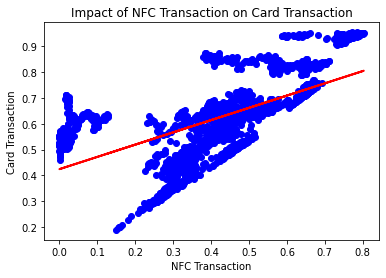

In [32]:
Card_transaction_hat = model_Developed_19_22.params.Intercept+model_Developed_19_22.params.NFC_transaction*df_Developed_19_22['NFC_transaction']
plt.scatter(df_Developed_19_22.NFC_transaction, df_Developed_19_22.Card_transaction,  color='blue')
plt.plot(df_Developed_19_22.NFC_transaction, Card_transaction_hat, color='red', linewidth=2)
plt.title('Impact of NFC Transaction on Card Transaction')
plt.xlabel('NFC Transaction')
plt.ylabel('Card Transaction')

In [33]:
model_Developed_19_22_output = ols(formula='Card_transaction~NFC_transaction+Remote_Card_transaction+country_name+date_index', data=df_Developed_19_22).fit()
print(model_Developed_19_22_output.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     437.7
Date:                Tue, 14 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:12:59   Log-Likelihood:                 4289.8
No. Observations:                1872   AIC:                            -8264.
Df Residuals:                    1714   BIC:                            -7389.
Df Model:                         157                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

# Developing Countries 2019 - 2022

Preprocessing

In [34]:
Developing_19_22=pd.read_csv("Developing Countries 2019-2022.csv")

In [35]:
Developing_19_22

,ISO2,country name,date,cp_ratio_txn_cnt,contactless_ratio_txn_cnt,cnp_ratio_txn_cnt
0,AR,Argentina,2.9.19,0.76141,0.00570,0.19270
1,AR,Argentina,9.9.19,0.75373,0.00646,0.17787
2,AR,Argentina,16.9.19,0.74579,0.00706,0.17882
3,AR,Argentina,23.9.19,0.75196,0.01021,0.19034
4,AR,Argentina,30.9.19,0.76124,0.00814,0.19496
...,...,...,...,...,...,...
715,ZA,South Africa,2.5.22,0.84510,0.36501,0.15062
716,ZA,South Africa,9.5.22,0.84959,0.40622,0.14690
717,ZA,South Africa,16.5.22,0.84988,0.41419,0.14629
718,ZA,South Africa,23.5.22,0.84272,0.40698,0.15320


In [36]:
Developing_19_22.rename(columns = {'country name':'country_name'}, inplace = True)
Developing_19_22.rename(columns = {'cp_ratio_txn_cnt':'Card_transaction'}, inplace = True)
Developing_19_22['NFC_transaction']=Developing_19_22['contactless_ratio_txn_cnt']*Developing_19_22['Card_transaction']
Developing_19_22['Remote_Card_transaction']=Developing_19_22['cnp_ratio_txn_cnt']*Developing_19_22['Card_transaction']
Developing_19_22 = Developing_19_22.drop(columns = ['ISO2','contactless_ratio_txn_cnt','cnp_ratio_txn_cnt'])

In [37]:
Developing_19_22

,country_name,date,Card_transaction,NFC_transaction,Remote_Card_transaction
0,Argentina,2.9.19,0.76141,0.004340,0.146724
1,Argentina,9.9.19,0.75373,0.004869,0.134066
2,Argentina,16.9.19,0.74579,0.005265,0.133362
3,Argentina,23.9.19,0.75196,0.007678,0.143128
4,Argentina,30.9.19,0.76124,0.006196,0.148411
...,...,...,...,...,...
715,South Africa,2.5.22,0.84510,0.308470,0.127289
716,South Africa,9.5.22,0.84959,0.345120,0.124805
717,South Africa,16.5.22,0.84988,0.352012,0.124329
718,South Africa,23.5.22,0.84272,0.342970,0.129105


In [38]:
uniqe_df_2 = Developing_19_22["date"].unique()
df_small_array_2 = pd.DataFrame(data={'date': uniqe_df_2})
df_small_array_2.to_csv("./file.csv", sep=',',index=False)
df_small_array_2_index=df_small_array_2.reset_index()

In [39]:
df_Developing_19_22 = pd.merge(df_small_array_2_index, 
                      Developing_19_22, 
                      on = 'date', 
                      how = 'inner')

In [40]:
df_Developing_19_22.rename(columns = {'index':'date_index'}, inplace = True)
df_Developing_19_22=df_Developing_19_22.drop(columns = ['date'])

In [41]:
df_Developing_19_22

,date_index,country_name,Card_transaction,NFC_transaction,Remote_Card_transaction
0,0,Argentina,0.76141,0.004340,0.146724
1,0,Brazil,0.81955,0.007646,0.124195
2,0,India,0.42048,0.040480,0.242520
3,0,Russia,0.85456,0.710174,0.120638
4,0,South Africa,0.88452,0.071761,0.099376
...,...,...,...,...,...
715,143,Argentina,0.57042,0.173482,0.231203
716,143,Brazil,0.82874,0.305125,0.134720
717,143,India,0.54690,0.145716,0.247800
718,143,Russia,0.00000,0.000000,0.000000


In [42]:
df_Developing_19_22[['date_index']] = df_Developing_19_22[['date_index']].astype("object")

In [43]:
df_Developing_19_22[['Card_transaction','NFC_transaction']].corr().round(2)

,Card_transaction,NFC_transaction
Card_transaction,1.00,0.44
NFC_transaction,0.44,1.00


Model

In [44]:
model_Developing_19_22 = ols(formula='Card_transaction~NFC_transaction', data=df_Developing_19_22).fit()
print(model_Developing_19_22.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     177.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):           2.69e-36
Time:                        18:13:34   Log-Likelihood:                 173.48
No. Observations:                 720   AIC:                            -343.0
Df Residuals:                     718   BIC:                            -333.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.5927      0.009     

Text(0, 0.5, 'Card Transaction')

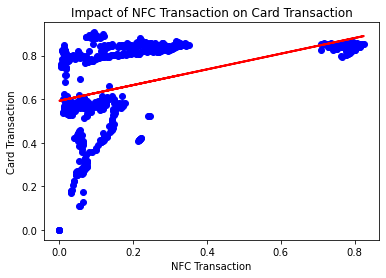

In [45]:
Card_transaction_hat = model_Developing_19_22.params.Intercept+model_Developing_19_22.params.NFC_transaction*df_Developing_19_22['NFC_transaction']
plt.scatter(df_Developing_19_22.NFC_transaction, df_Developing_19_22.Card_transaction,  color='blue')
plt.plot(df_Developing_19_22.NFC_transaction, Card_transaction_hat, color='red', linewidth=2)
plt.title('Impact of NFC Transaction on Card Transaction')
plt.xlabel('NFC Transaction')
plt.ylabel('Card Transaction')

In [46]:
model_Developing_19_22_output = ols(formula='Card_transaction~NFC_transaction+Remote_Card_transaction+country_name+date_index', data=df_Developing_19_22).fit()
print(model_Developing_19_22_output.summary())

                            OLS Regression Results                            
Dep. Variable:       Card_transaction   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     62.87
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.05e-278
Time:                        18:13:35   Log-Likelihood:                 1123.1
No. Observations:                 720   AIC:                            -1946.
Df Residuals:                     570   BIC:                            -1259.
Df Model:                         149                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       